## Introduction

In this Jupyter notebook, we will analyze a dataset containing comments that may be toxic. Our goal is to train a machine learning model that can effectively predict whether a comment is harmful. We will be using the sklearn library to preprocess the dataset, create features, train the model, and evaluate the performance.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

In [7]:
df = pd.read_csv('train_preprocessed.csv')

## Dataset

The dataset we are using is `train_preprocessed.csv`, which consists of comments and their respective labels. These labels include 'identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', and 'toxic'. Each comment is annotated with binary values for each label, indicating whether the comment is considered toxic under that category.
### Check the dimensions of the dataset

In [8]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (159571, 10)


## Check for missing values

In [9]:
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
comment_text     0
id               0
identity_hate    0
insult           0
obscene          0
set              0
severe_toxic     0
threat           0
toxic            0
toxicity         0
dtype: int64


## Data Exploration

Before diving into training the model, it is essential to explore and understand the dataset. Some useful visualizations and statistics will provide insights into the data and help us make informed decisions when training the model. 

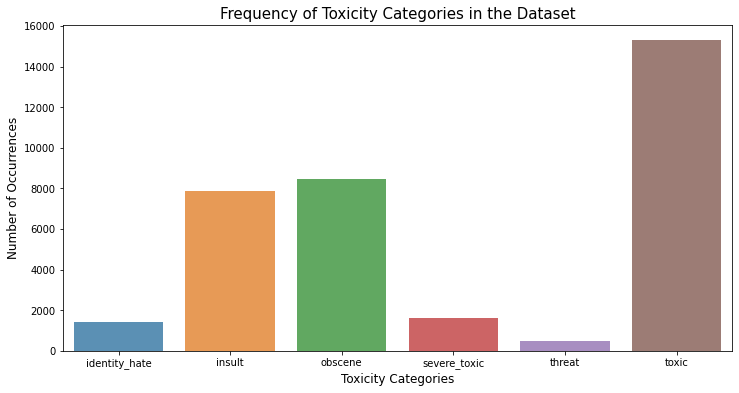

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
label_names = ['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']
label_counts = df[label_names].sum()
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Toxicity Categories', fontsize=12)
plt.title('Frequency of Toxicity Categories in the Dataset', fontsize=15)
plt.show()

## Preprocessing and Feature Extraction

We will be using the `CountVectorizer` class from the sklearn library to convert the comments into a matrix of token counts. This representation will serve as the input features for our model. The labels will remain unchanged.


In [11]:
df = pd.read_csv('train_preprocessed.csv')
train_df, test_df = train_test_split(df, test_size=0.2)
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_df['comment_text'])
test_features = vectorizer.transform(test_df['comment_text'])

## Model Training

We will be using the `OneVsRestClassifier` from the sklearn library with `LogisticRegression` as the base classifier. This approach enables the model to predict multiple labels for each comment.

In [12]:
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(train_features, train_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']])
test_pred = clf.predict(test_features)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

## Show the top words in toxic and non-toxic comments.

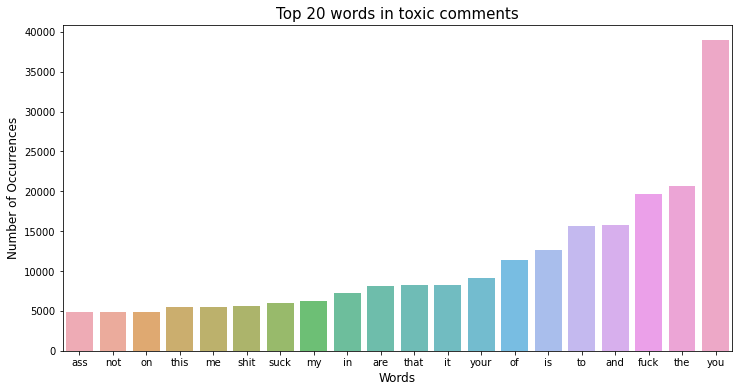

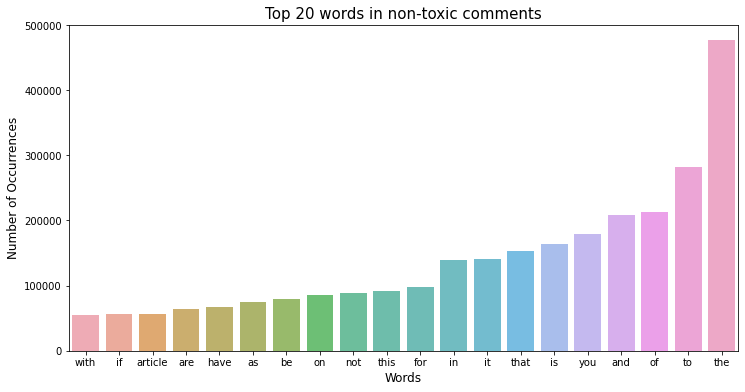

In [13]:
def plot_top_words(vectorizer, features, n_top_words, title):
    word_counts = features.sum(axis=0).tolist()[0]
    word_indices = list(np.argsort(word_counts))[-n_top_words:]
    top_words = [vectorizer.get_feature_names_out()[i] for i in word_indices]
    top_counts = [word_counts[i] for i in word_indices]

    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_words, y=top_counts, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel('Words', fontsize=12)
    plt.title(title, fontsize=15)
    plt.show()

import numpy as np
n_top_words = 20
toxic_mask = (df['toxic'] == 1)
toxic_comments = df.loc[toxic_mask, 'comment_text']
toxic_features = vectorizer.transform(toxic_comments)
plot_top_words(vectorizer, toxic_features, n_top_words, "Top 20 words in toxic comments")

non_toxic_mask = (df['toxic'] == 0)
non_toxic_comments = df.loc[non_toxic_mask, 'comment_text']
non_toxic_features = vectorizer.transform(non_toxic_comments)
plot_top_words(vectorizer, non_toxic_features, n_top_words, "Top 20 words in non-toxic comments")

## Model Evaluation

We will evaluate the performance of our model using two metrics: accuracy and the F1-score. These metrics will help us understand how well the model is performing in predicting whether a comment is toxic or not.

Accuracy: 0.912, F1-score: 0.703


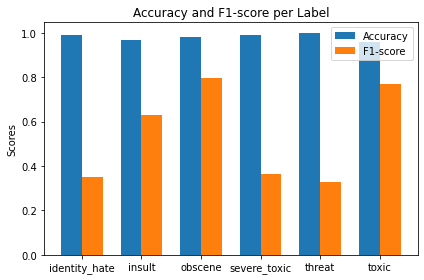

In [14]:
accuracy = accuracy_score(test_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']], test_pred)
f1 = f1_score(test_df[['identity_hate', 'insult', 'obscene', 'severe_toxic', 'threat', 'toxic']], test_pred, average='weighted')
print(f'Accuracy: {accuracy:.3f}, F1-score: {f1:.3f}')

# Calculate accuracy and F1-score for each label
accuracy_per_label = []
f1_per_label = []
for label in label_names:
    accuracy_per_label.append(accuracy_score(test_df[label], test_pred[:, label_names.index(label)]))
    f1_per_label.append(f1_score(test_df[label], test_pred[:, label_names.index(label)]))

# Plot accuracy and F1-score per label
x = np.arange(len(label_names))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_per_label, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_per_label, width, label='F1-score')

ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1-score per Label')
ax.set_xticks(x)
ax.set_xticklabels(label_names)
ax.legend()

fig.tight_layout()
plt.show()

## Confusion Matrices
We can create confusion matrices for each of the labels to visualize the performance of the model. The confusion matrix shows the true positives, true negatives, false positives, and false negatives for each label.

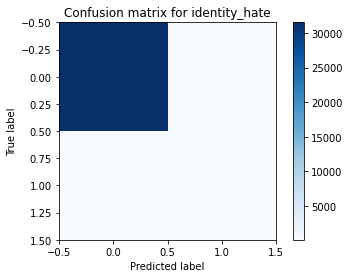

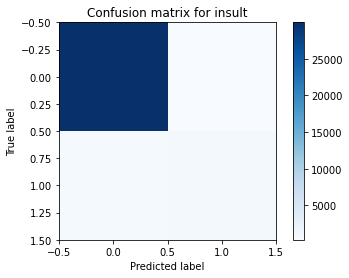

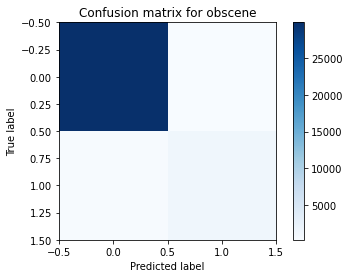

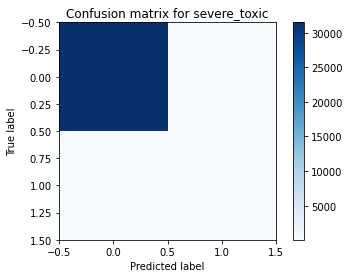

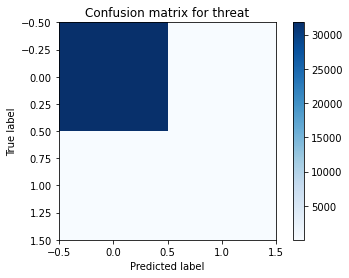

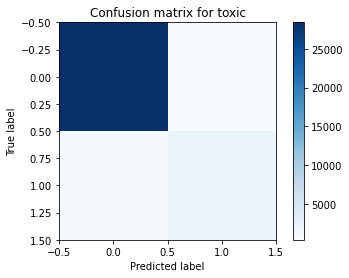

In [15]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
def plot_confusion_matrix(y_true, y_pred, label_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion matrix for {label_name}')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

for i, label_name in enumerate(label_names):
    plot_confusion_matrix(test_df[label_name], test_pred[:, i], label_name)

## Precision-Recall Curves
Precision-Recall curves show the trade-off between precision and recall for different thresholds. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

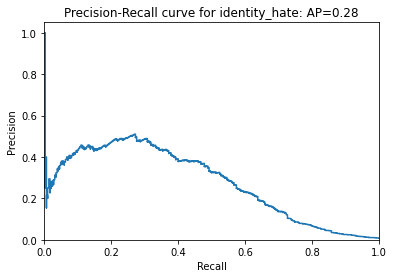

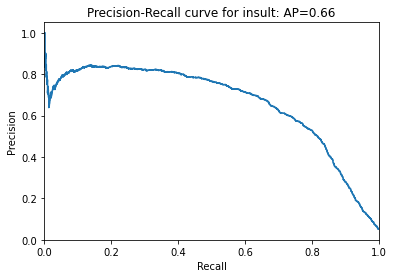

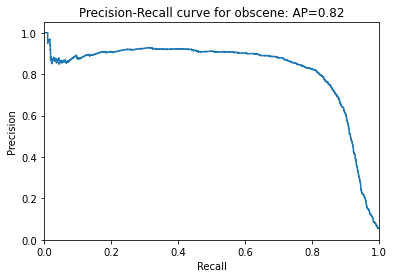

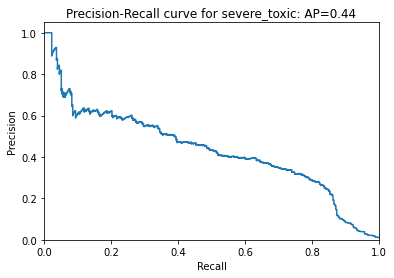

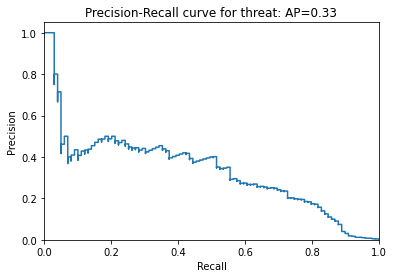

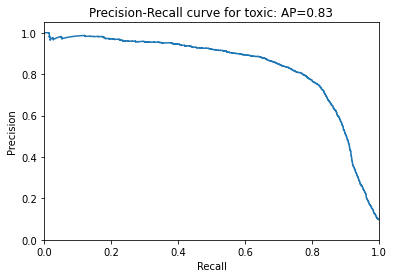

In [16]:
def plot_precision_recall_curve(y_true, y_scores, label_name):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    average_precision = average_precision_score(y_true, y_scores)
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title(f'Precision-Recall curve for {label_name}: AP={average_precision:.2f}')
    plt.show()

y_scores = clf.decision_function(test_features)
for i, label_name in enumerate(label_names):
    plot_precision_recall_curve(test_df[label_name], y_scores[:, i], label_name)

## Perdiction
Warning: Offensive words included

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output

def predict_toxicity(comments):
    features = vectorizer.transform(comments)
    predictions = clf.predict(features)
    pred_probabilities = clf.predict_proba(features)

    for i, comment in enumerate(comments):
        print(f"Comment {i + 1}:")
        print(comment)
        print("\nPredictions:")

        for j, label in enumerate(label_names):
            print(f"{label}: {predictions[i][j]}, Probability: {pred_probabilities[i][j]:.2f}")

        print("\n" + "-" * 50 + "\n")

# Usage example:
new_comments = [
    'The effort she had to pour into this must have been monumental. We cant thank Gura enough. Her and everyone involved. What a show',
    'Id nominate Gura for an Oscar, I genuinely could not tell if she passed elementary math or if its all an act.',
    'The showcase was genuinely so funny and entertaining. Thanks to everyone involved!',
    'Gura is a whore, she only deserves to give me a blowjob',
    'No one really likes Gura, I cant wait to see her death',
    'you deserve to starve, the nazis should have killed you inferior peoples',
    'you are a bunch of bitch for American whores',
]

predict_toxicity(new_comments)


Comment 1:
The effort she had to pour into this must have been monumental. We cant thank Gura enough. Her and everyone involved. What a show

Predictions:
identity_hate: 0, Probability: 0.02
insult: 0, Probability: 0.01
obscene: 0, Probability: 0.00
severe_toxic: 0, Probability: 0.01
threat: 0, Probability: 0.00
toxic: 0, Probability: 0.01

--------------------------------------------------

Comment 2:
Id nominate Gura for an Oscar, I genuinely could not tell if she passed elementary math or if its all an act.

Predictions:
identity_hate: 0, Probability: 0.01
insult: 0, Probability: 0.00
obscene: 0, Probability: 0.01
severe_toxic: 0, Probability: 0.01
threat: 0, Probability: 0.00
toxic: 0, Probability: 0.01

--------------------------------------------------

Comment 3:
The showcase was genuinely so funny and entertaining. Thanks to everyone involved!

Predictions:
identity_hate: 0, Probability: 0.01
insult: 0, Probability: 0.04
obscene: 0, Probability: 0.02
severe_toxic: 0, Probabilit